<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Stuff" data-toc-modified-id="Import-Stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Stuff</a></span><ul class="toc-item"><li><span><a href="#Anonymous-Functions" data-toc-modified-id="Anonymous-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Anonymous Functions</a></span></li><li><span><a href="#Named-Functions" data-toc-modified-id="Named-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Named Functions</a></span></li></ul></li></ul></div>

# Import Stuff

In [32]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pd.options.mode.chained_assignment = None # Suppresses annoying warning

sns.set(font_scale=1.5)
sns.set_context("poster")

with open("tidy_data/pmap_vacuum.pkl","rb") as _filein:
    raw_data = pkl.load(_filein)
    
raw_df = pd.DataFrame(raw_data)
raw_df.fill = raw_df.fill.apply(int)
raw_df.config = raw_df.config.apply(int)
raw_df.coupling

0      antiferro
1      antiferro
2      antiferro
3      antiferro
4      antiferro
5      antiferro
6      antiferro
7      antiferro
8      antiferro
9      antiferro
10     antiferro
11     antiferro
12     antiferro
13     antiferro
14     antiferro
15     antiferro
16     antiferro
17     antiferro
18     antiferro
19     antiferro
20     antiferro
21     antiferro
22     antiferro
23     antiferro
24     antiferro
25     antiferro
26     antiferro
27     antiferro
28     antiferro
29     antiferro
         ...    
510        ferro
511        ferro
512        ferro
513        ferro
514        ferro
515        ferro
516        ferro
517        ferro
518        ferro
519        ferro
520        ferro
521        ferro
522        ferro
523        ferro
524        ferro
525        ferro
526        ferro
527        ferro
528        ferro
529        ferro
530        ferro
531        ferro
532        ferro
533        ferro
534        ferro
535        ferro
536        ferro
537        fer

## Anonymous Functions

In [25]:
filter_by_fill = lambda fill, df=raw_df: df[df.fill == fill]
filter_by_couple = lambda couple, df: df[df.coupling == couple]


## Named Functions

In [37]:

def zero_energy(fill,couple="antiferro"):
    df = filter_by_couple(couple,filter_by_fill(fill))
    df.sort_values("config",axis=0,inplace=True)
    zero_en = df.energy.values[0]
    df.energy -= zero_en
    scale = len(df.config)-1
    df.config *= 0.01
    
    return df
def plot_zeroed_comparison(couple="antiferro"):
    fig = plt.figure(figsize=(16,12))
    ax = plt.gca()

    for fill in set(raw_df.fill.values):
        if fill == 1000:
            sns.lineplot(x="config",y="energy",data=zero_energy(fill,couple="antiferro"),ax=ax,label="Fill: {}".format(fill))
        else:
            sns.lineplot(x="config",y="energy",data=zero_energy(fill,couple=couple),ax=ax,label="Fill: {}".format(fill))

    ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    ax.set(xlabel="Rotation Angle [rad]",ylabel="Energy [eV]")


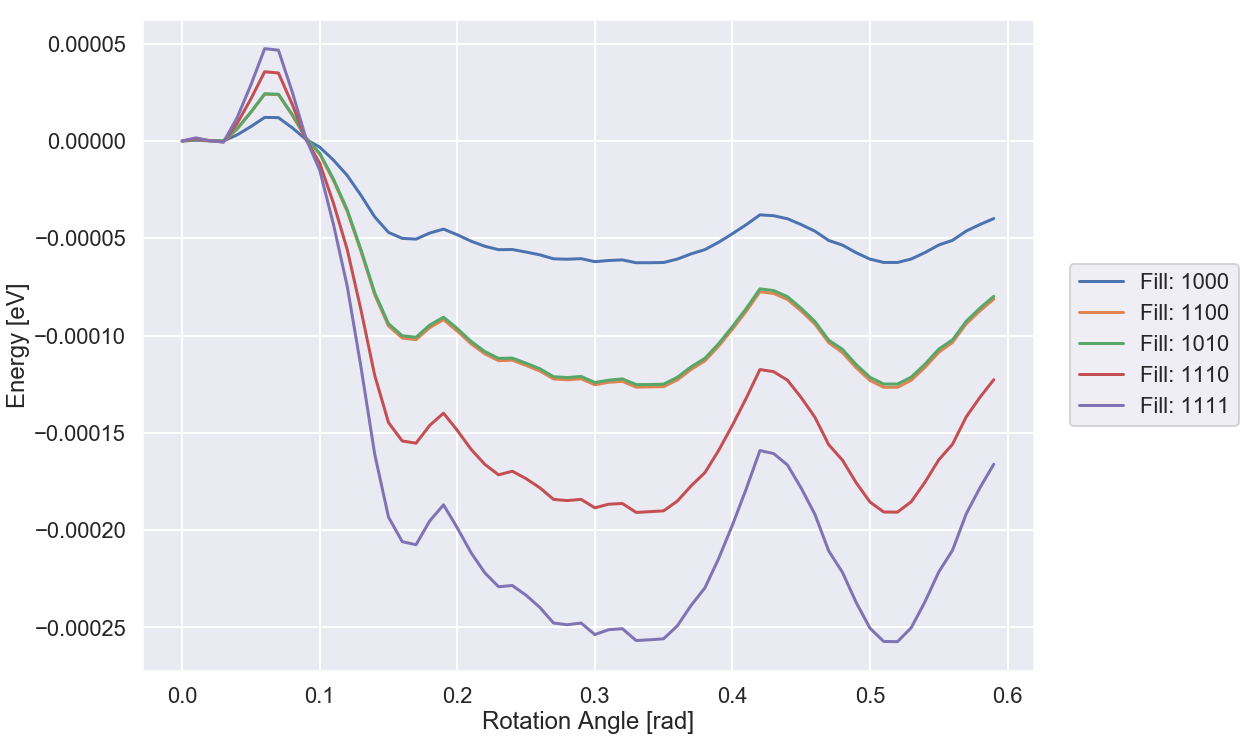

In [42]:
plot_zeroed_comparison()

In [43]:
with open("../difference_analysis/tidy_data/df_vacuum.pkl",'wb') as fout:
    pkl.dump(raw_df,fout)